# Example usage of the combined feature extraction
Requirements:
- pandas
- numpy
- PyTorch (for Kymatio)
- [Kymatio](https://pypi.org/project/kymatio/)

- [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/quick_start.html#install-tsfresh)
- [TSFEL](https://pypi.org/project/tsfel/)
- [Cesium](https://cesium-ml.org/docs/install.html)



## Data format
The Combined Feature Extraction library deals with 2D numpy arrays where each row is a light curve

In [1]:
import numpy as np
import pandas as pd
import math
import torch # for kymatio
import matplotlib.pyplot as plt
import Combined_Feature_Extraction as CFE

#### Read in a light curve + interpolate

In [2]:
file_name = ".//001026895.txt"

# it does not matter how the file is read, we only need the Flux column
light_curve = pd.read_csv(file_name,delim_whitespace = True, names = ["Time","Flux","Error"], index_col = 0)
light_curve = light_curve["Flux"].values

# linear interpolation
def interpolateArray(array):
    array = array.astype('float64')
    for i in range(len(array)):
        if math.isnan(array[i]):
            j = i
            while(math.isnan(array[j]) and j < len(array)):
                j+=1
            array[i] = (array[j] + (j-i) * array[i-1]) / (j-i + 1)
    return array

light_curve = interpolateArray(light_curve)

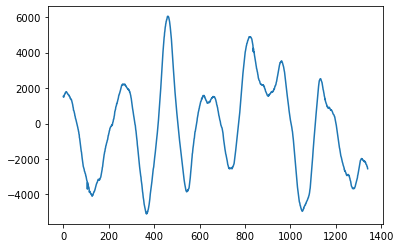

In [3]:
plt.plot(light_curve)

#### Test feature extraction
The feature extraction takes a 2D array

one can specify which feature libraries to apply by passing the optional boolean parameters 

In [4]:
X = np.array([light_curve])

In [5]:
features = CFE.AutomatedFeatureExtraction().fit_transform(X)

# You can specify which feature libraries to apply by passing optional boolean parameters, e.g.:
# features = CFE.AutomatedFeatureExtraction(tsfresh = True, tsfel = False, cesium = True).fit_transform(X)

print(features.shape)

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.52s/it]

*** Feature extraction started ***



*** Feature extraction finished ***
(1, 24)


#### Kymatio works similarly
Kymatio provides a numpy, sklearn, and PyTorch implementation: [Kymatio user guide](https://www.kymat.io/userguide.html#numpy).
Here, the PyTorch implementation is used for efficiency

##### The WST (Wavelet Scattering Transform) function takes 3 optional arguments:
- J: scale parameter
- Q: number of wavelet filters per octave
- device: either 'cpu' or 'cuda' (GPU), according to the [PyTorch specification](https://pytorch.org/docs/stable/notes/cuda.html)


In [6]:
S = CFE.WST().fit_transform(X)
print(S.shape)

torch.Size([1, 546])


# Additional information
Configuration:
Each feature extraction library needs a configuration file. These files are constructed internally in the Combined Feature Extraction file, based on the hardcoded feature names. 

Cesium:
Cesium requires the timestamps of the observations for the Welch method. However, to enable compatibility, and because the timestamps are evenly spaced anyway, the observation_duration is simply hardcoded as 27.3822 days. To use with other datasets, modify the observation_duration parameter in the CesiumFeatures() method.